In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree       # Import Decision Tree Classifier and plot_tree 
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.shape

(395, 33)

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (0, 33)


In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'school':
['GP' 'MS']

Unique values in 'sex':
['F' 'M']

Unique values in 'age':
[18 17 15 16 19 22 20 21]

Unique values in 'address':
['U' 'R']

Unique values in 'famsize':
['GT3' 'LE3']

Unique values in 'Pstatus':
['A' 'T']

Unique values in 'Medu':
[4 1 3 2 0]

Unique values in 'Fedu':
[4 1 2 3 0]

Unique values in 'Mjob':
['at_home' 'health' 'other' 'services' 'teacher']

Unique values in 'Fjob':
['teacher' 'other' 'services' 'health' 'at_home']

Unique values in 'reason':
['course' 'other' 'home' 'reputation']

Unique values in 'guardian':
['mother' 'father' 'other']

Unique values in 'traveltime':
[2 1 3 4]

Unique values in 'studytime':
[2 3 1 4]

Unique values in 'failures':
[0 3 2 1]

Unique values in 'schoolsup':
['yes' 'no']

Unique values in 'famsup':
['no' 'yes']

Unique values in 'paid':
['no' 'yes']

Unique values in 'activities':
['no' 'yes']

Unique values in 'nursery':
['yes' 'no']

Unique values in 'higher':
['yes' 'no']

Unique values in 'interne

In [10]:
print("Original columns:", df.columns)


Original columns: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [11]:
df.rename(columns={'Mjob': 'Mothers job'}, inplace=True)
df.rename(columns={'Fjob': 'Fathers job'}, inplace=True)
df.rename(columns={'Fjob': 'Fathers job'}, inplace=True)
df.rename(columns={'Pstatus': 'Paretns status'}, inplace=True)
df.rename(columns={'schoolsup': 'school support'}, inplace=True)
df.rename(columns={'famsup': 'family support'}, inplace=True)
df.rename(columns={'higher': 'further study'}, inplace=True)
df.rename(columns={'Dalc': 'Week day alcohol'}, inplace=True)
df.rename(columns={'Walc': 'Weekends alcohol'}, inplace=True)

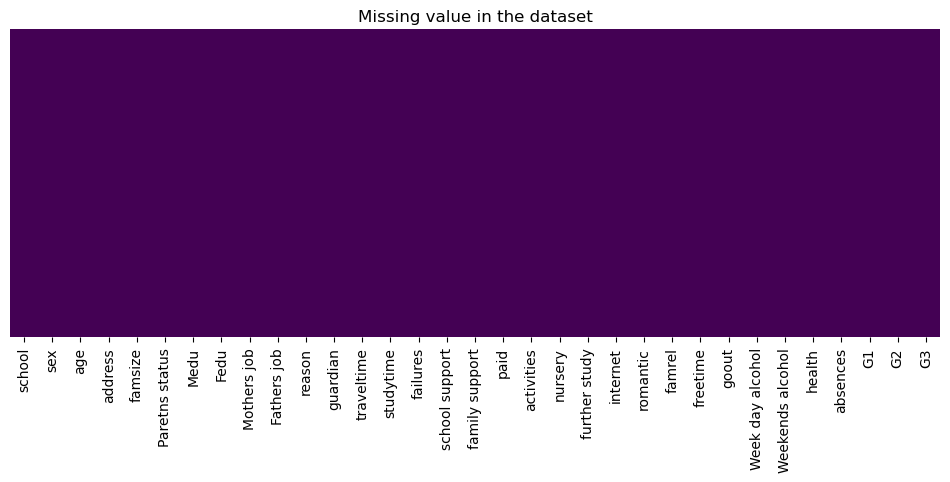

In [12]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [13]:
df['GAvg'] = (df['G1'] + df['G2'] + df['G3']) / 3

In [14]:
def define_grade(df):
    # Create a list to store the data
    grades = []

    # For each row in the column,
    for row in df['GAvg']:
        # if more than a value,
        if row >= (0.9 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('A')
        # else, if more than a value,
        elif row >= (0.7 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('B')
        # else, if more than a value,
        elif row < (0.7 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('C')   
    # Create a column from the list
    df['grades'] = grades
    return df

In [15]:
df = define_grade(df)
df.head()

,school,sex,age,address,famsize,Paretns status,Medu,Fedu,Mothers job,Fathers job,...,goout,Week day alcohol,Weekends alcohol,health,absences,G1,G2,G3,GAvg,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,C


In [16]:
df.drop(["school","age","address","address","Mothers job","Fathers job"], axis=1, inplace=True)

In [17]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
print(len(categorical_columns))

['sex', 'famsize', 'Paretns status', 'reason', 'guardian', 'school support', 'family support', 'paid', 'activities', 'nursery', 'further study', 'internet', 'romantic', 'grades']
14


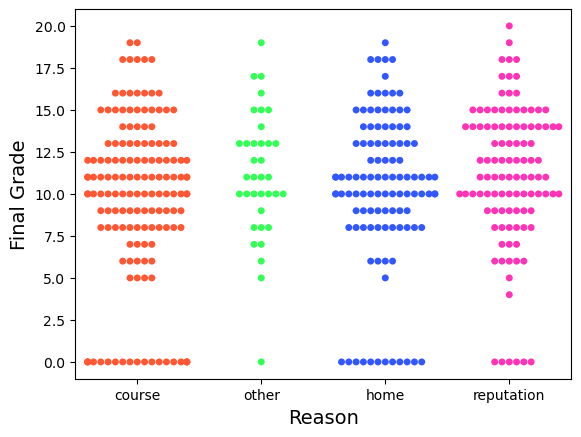

In [18]:
custom_palette = ["#FF5733", "#33FF57", "#3357FF", "#FF33B5"]
b = sns.swarmplot(x='reason', y='G3', data=df,palette=custom_palette)
b.set_xlabel('Reason', fontsize = 14)
b.set_ylabel('Final Grade', fontsize = 14)
plt.show()

In [19]:
d = {'yes': 1, 'no': 0}
df['school support'] = df['school support'].map(d)
df['family support'] = df['family support'].map(d)
df['paid'] = df['paid'].map(d)
df['activities'] = df['activities'].map(d)
df['nursery'] = df['nursery'].map(d)
df['further study'] = df['further study'].map(d)
df['internet'] = df['internet'].map(d)
df['romantic'] = df['romantic'].map(d)

In [20]:
# map the sex data
d = {'F': 1, 'M': 0}
df['sex'] = df['sex'].map(d)

# map the famili size data
d = {'LE3': 1, 'GT3': 0}
df['famsize'] = df['famsize'].map(d)

# map the parent's status
d = {'T': 1, 'A': 0}
df['Paretns status'] = df['Paretns status'].map(d)


# map the reason data
d = {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
df['reason'] = df['reason'].map(d)

# map the guardian data
d = {'mother': 0, 'father': 1, 'other': 2}
df['guardian'] = df['guardian'].map(d)

# map the grades data
d = {'C': 0, 'B': 1, 'A': 2}
df['grades'] = df['grades'].map(d)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               395 non-null    int64  
 1   famsize           395 non-null    int64  
 2   Paretns status    395 non-null    int64  
 3   Medu              395 non-null    int64  
 4   Fedu              395 non-null    int64  
 5   reason            395 non-null    int64  
 6   guardian          395 non-null    int64  
 7   traveltime        395 non-null    int64  
 8   studytime         395 non-null    int64  
 9   failures          395 non-null    int64  
 10  school support    395 non-null    int64  
 11  family support    395 non-null    int64  
 12  paid              395 non-null    int64  
 13  activities        395 non-null    int64  
 14  nursery           395 non-null    int64  
 15  further study     395 non-null    int64  
 16  internet          395 non-null    int64  
 1

In [22]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'sex':
[1 0]

Unique values in 'famsize':
[0 1]

Unique values in 'Paretns status':
[0 1]

Unique values in 'Medu':
[4 1 3 2 0]

Unique values in 'Fedu':
[4 1 2 3 0]

Unique values in 'reason':
[2 3 0 1]

Unique values in 'guardian':
[0 1 2]

Unique values in 'traveltime':
[2 1 3 4]

Unique values in 'studytime':
[2 3 1 4]

Unique values in 'failures':
[0 3 2 1]

Unique values in 'school support':
[1 0]

Unique values in 'family support':
[0 1]

Unique values in 'paid':
[0 1]

Unique values in 'activities':
[0 1]

Unique values in 'nursery':
[1 0]

Unique values in 'further study':
[1 0]

Unique values in 'internet':
[0 1]

Unique values in 'romantic':
[0 1]

Unique values in 'famrel':
[4 5 3 1 2]

Unique values in 'freetime':
[3 2 4 1 5]

Unique values in 'goout':
[4 3 2 1 5]

Unique values in 'Week day alcohol':
[1 2 5 3 4]

Unique values in 'Weekends alcohol':
[1 3 2 4 5]

Unique values in 'health':
[3 5 1 2 4]

Unique values in 'absences':
[ 6  4 10  2  0 16 14  7 

In [23]:
Feature_columns = df.columns.tolist()
Feature_columns.remove('grades') 
Feature_columns.remove('GAvg') 
Feature_columns.remove('G1') 
Feature_columns.remove('G2') 
Feature_columns.remove('G3') 
Feature_columns

['sex',
 'famsize',
 'Paretns status',
 'Medu',
 'Fedu',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'school support',
 'family support',
 'paid',
 'activities',
 'nursery',
 'further study',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Week day alcohol',
 'Weekends alcohol',
 'health',
 'absences']

In [24]:
X = df[Feature_columns].copy()
X.columns

Index(['sex', 'famsize', 'Paretns status', 'Medu', 'Fedu', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'school support',
       'family support', 'paid', 'activities', 'nursery', 'further study',
       'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'Week day alcohol', 'Weekends alcohol', 'health', 'absences'],
      dtype='object')

In [25]:
y=df[['grades']].copy()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [27]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((395, 25), (395, 1), (355, 25), (40, 25), (355, 1), (40, 1))

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.7
Accuracy: 0.70


In [30]:
df['grades'].unique().tolist()

[0, 1, 2]

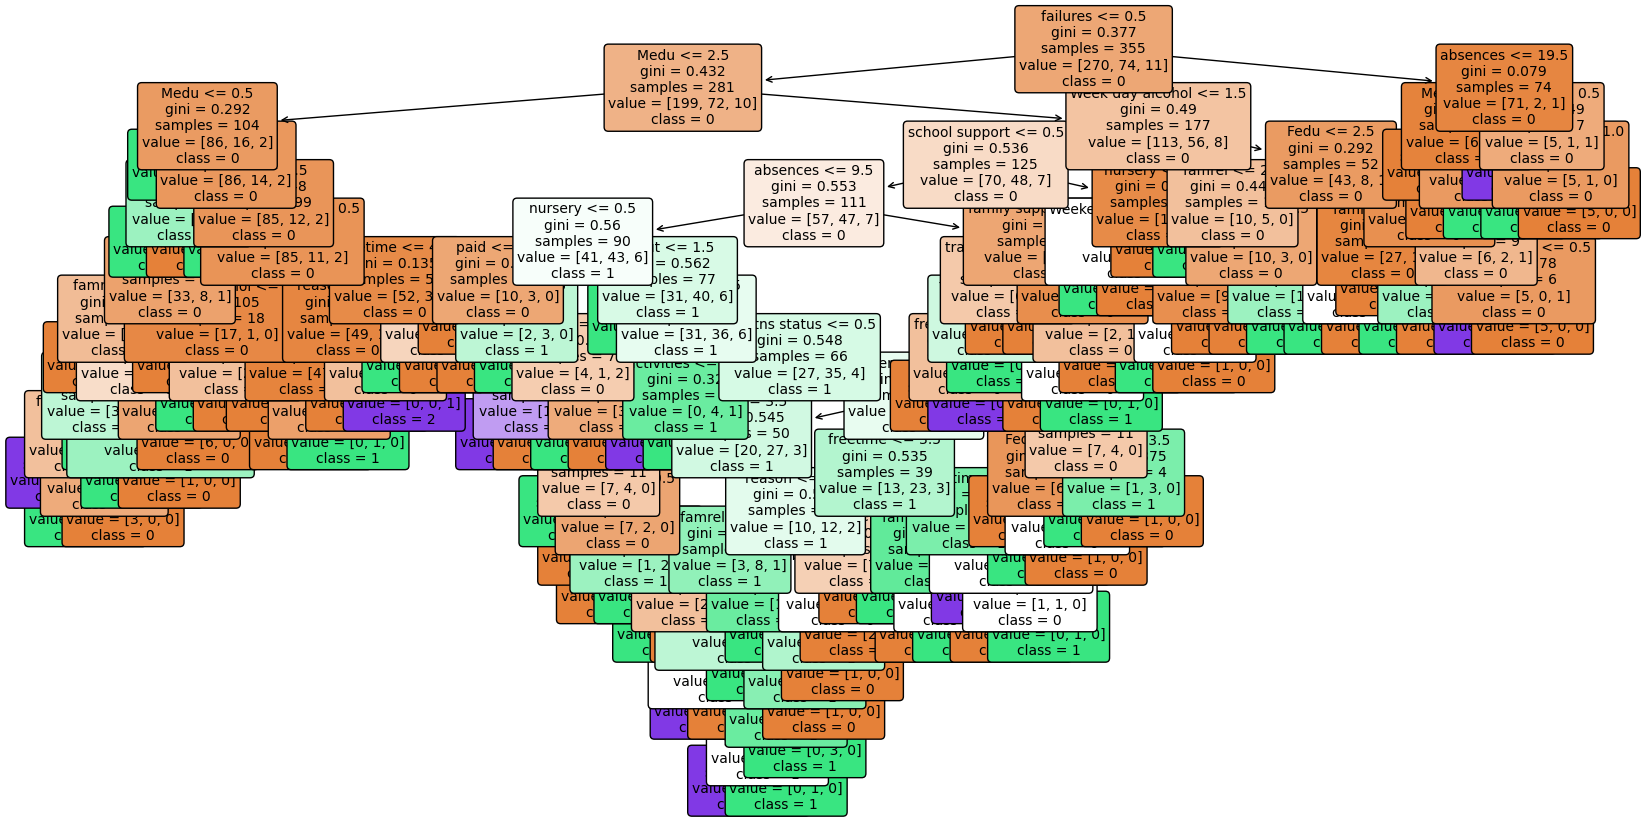

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=[str(label) for label in df['grades'].unique()], rounded=True, fontsize=10)
plt.show()

Optimizing Decision Tree Performance

In [32]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.775


              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2

    accuracy                           0.78        40
   macro avg       0.26      0.32      0.29        40
weighted avg       0.64      0.78      0.70        40



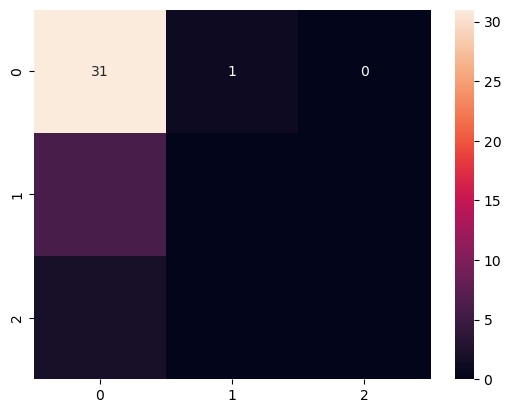

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
#Predict the response for test dataset
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
print(classification_report(y_test, y_pred))


<Axes: >

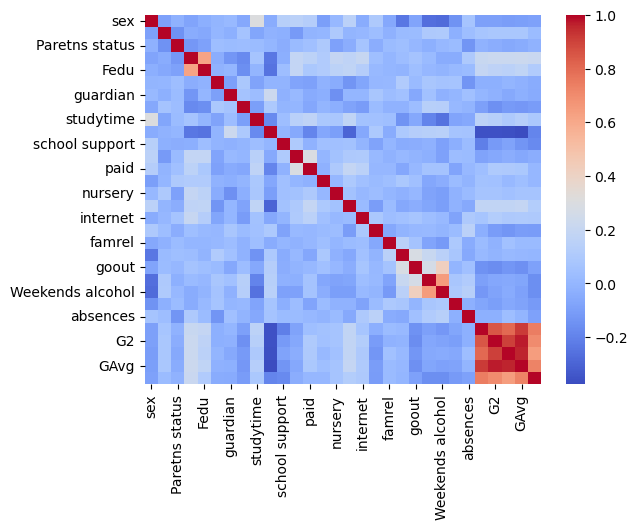

In [34]:

sns.heatmap(df.corr(), cmap='coolwarm')



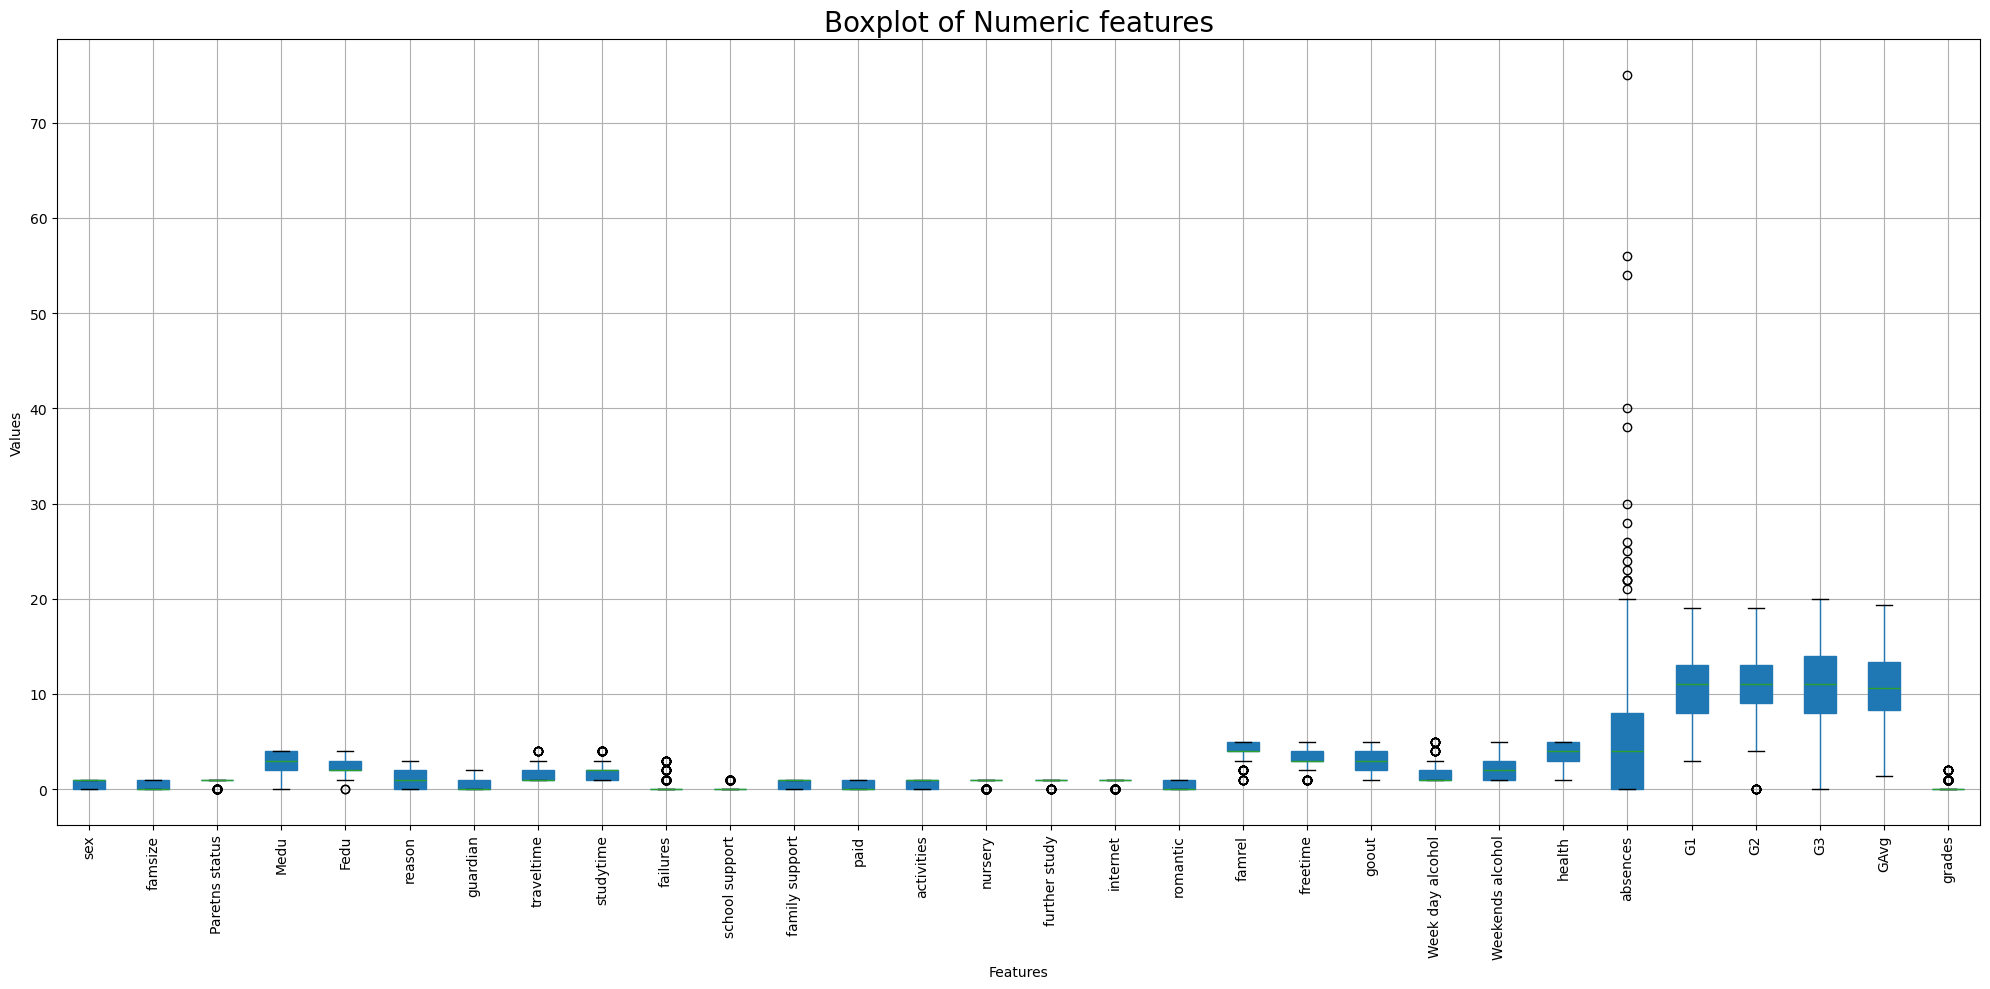

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
boxplot = df.boxplot(vert=True, patch_artist=True)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric features', fontsize=20)
plt.tight_layout() 
plt.show()


In [36]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [37]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.8
Accuracy: 0.80


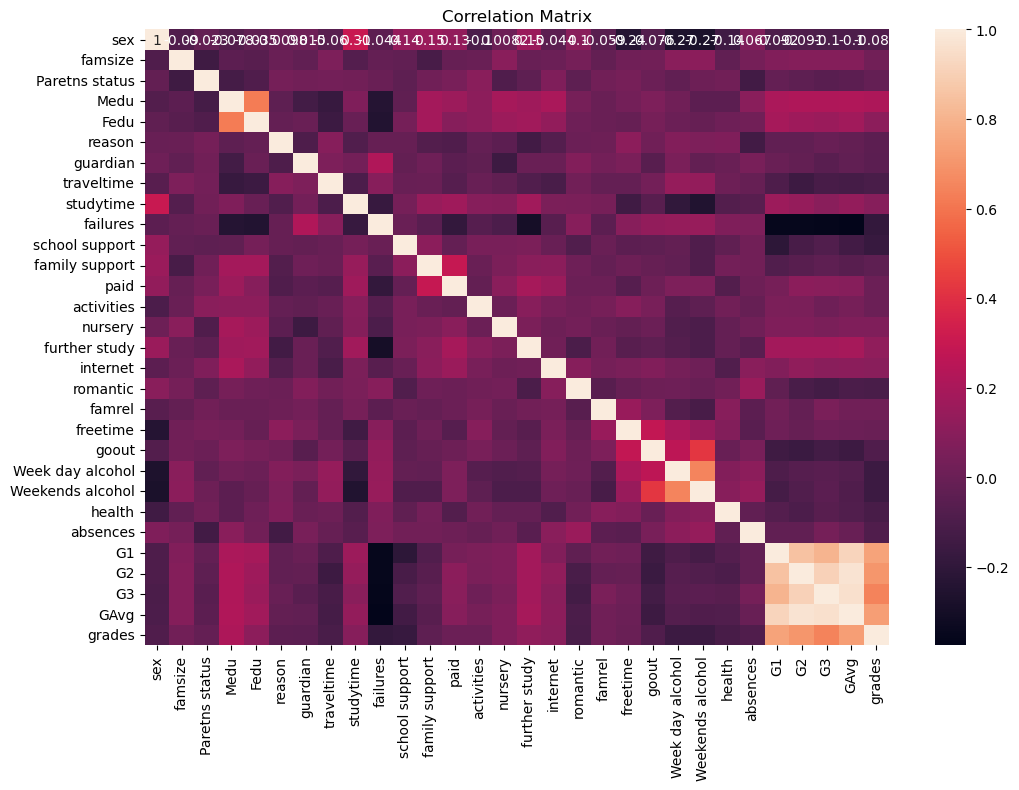

In [38]:
#Correlation Matrix
numerical_data = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

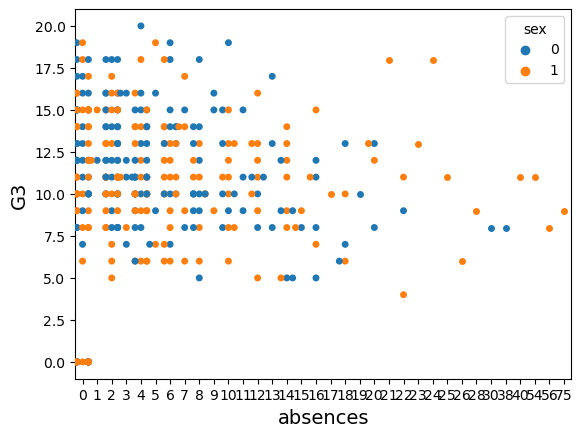

In [39]:
b = sns.swarmplot(x='absences', y='G3',hue='sex', data=df)
b.set_xlabel('absences', fontsize = 14)
b.set_ylabel('G3', fontsize = 14)
plt.show()

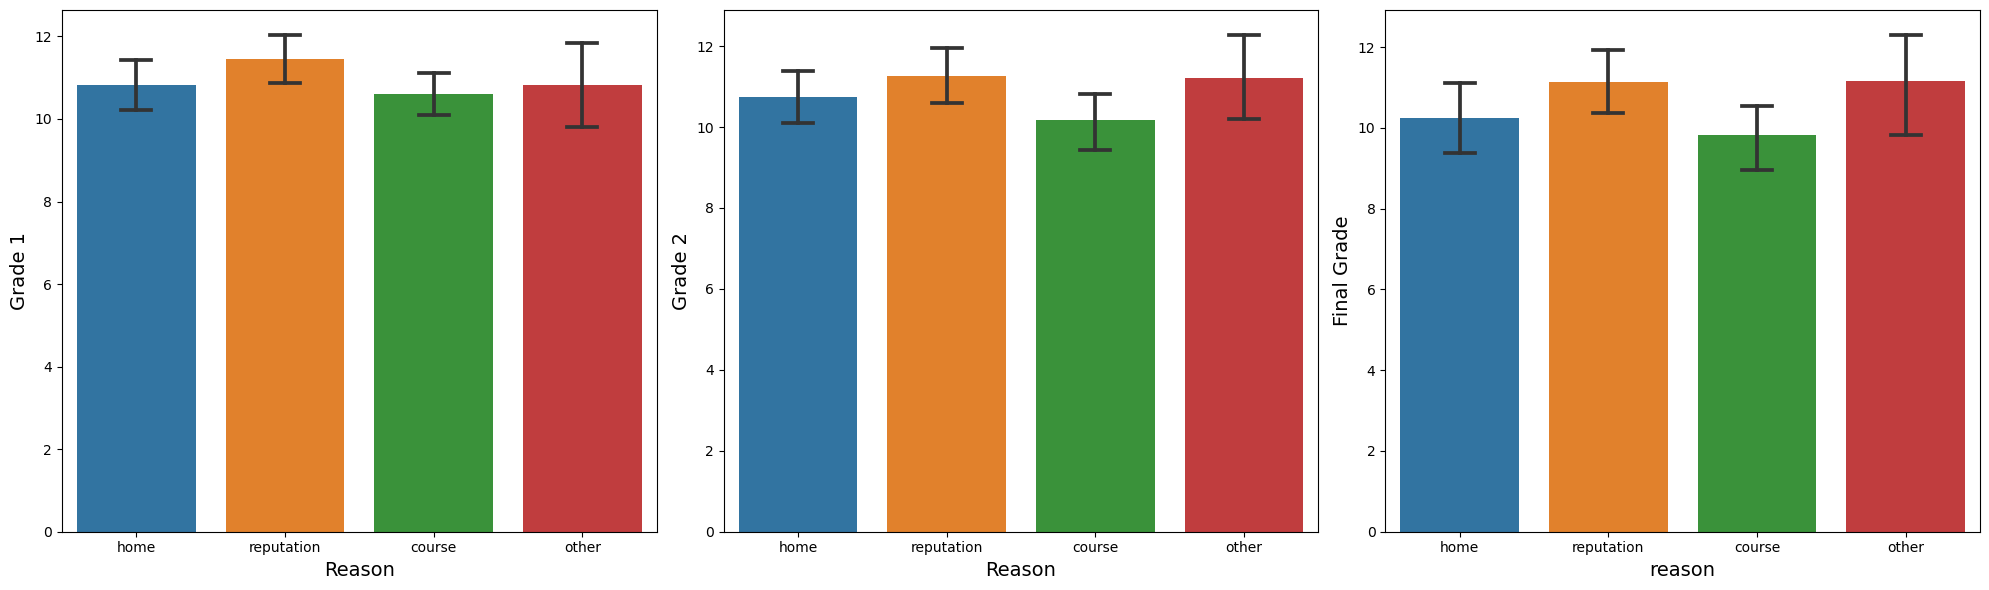

In [40]:
# Create a figure with three subplots arranged in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first chart
b1 = sns.barplot(x=df['reason'], y=df['G1'], data=df, ax=ax1, errcolor='0.2', capsize=0.2)
b1.set_xlabel('Reason', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["home", "reputation","course","other"])

# Plot the second chart
b2 = sns.barplot(x=df['reason'], y=df['G2'], data=df, ax=ax2, errcolor='0.2', capsize=0.2)
b2.set_xlabel('Reason', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["home", "reputation","course","other"])


b3 = sns.barplot(x=df['reason'], y=df['G3'], data=df, ax=ax3, errcolor='0.2', capsize=0.2)
b3.set_xlabel('reason', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["home", "reputation","course","other"])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Define the algorithms you want to evaluate
classifiers = [LogisticRegression()]

# Define the training split ratios
split_ratios = [0.2, 0.25, 0.3]

# Perform cross-validation for each split ratio and algorithm
for split_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_ratio, random_state=42)
    for clf in classifiers:
        scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
        print(f"Split ratio: {split_ratio}, Algorithm: {clf.__class__.__name__}, Mean accuracy: {scores.mean()}, Standard deviation: {scores.std()}")


Split ratio: 0.2, Algorithm: LogisticRegression, Mean accuracy: 0.7991666666666667, Standard deviation: 0.08153901588265039
Split ratio: 0.25, Algorithm: LogisticRegression, Mean accuracy: 0.7663157894736843, Standard deviation: 0.04735087394291572
Split ratio: 0.3, Algorithm: LogisticRegression, Mean accuracy: 0.7032608695652174, Standard deviation: 0.05306950735399803
